In [ ]:
import os
import io
import json
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Искусственный интеллект проводит таможенный контроль/dataset_20211126.csv', on_bad_lines='skip', encoding='cp1251', sep=';', quotechar='"')

In [ ]:
df

,TNVED,OPISANIE,DATA
0,9025,"ЧАСТИ И ПРИНАДЛЕЖНОСТИ АППАРАТУРЫ ПОЗ.9025, НЕ...",07.09.2021
1,8504,"ТРАНСФОРМАТОРЫ, МОЩНОСТЬЮ БОЛЕЕ 1 КВА, НО НЕ Б...",07.09.2021
2,8481,"КЛАПАНЫ ЗАПОРНЫЕ ИЗ СТАЛИ, НЕ ВОЕННОГО НАЗНАЧЕ...",07.09.2021
3,8531,УСТРОЙСТВА СИГНАЛИЗАЦИОННЫЕ ОХРАННЫЕ И УСТРОЙС...,07.09.2021
4,3402,"ВЕЩЕСТВА ПОВЕРХНОСТНО-АКТИВНЫЕ ОРГАНИЧЕСКИЕ, А...",02.09.2021
...,...,...,...
4177894,2710,"МИНЕРАЛЬНОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ Д...",24.10.2021
4177895,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021
4177896,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021
4177897,3403,"МАСЛО ТРАНСМИССИОННОЕ НА СИНТЕТИЧЕСКОЙ ОСНОВЕ,...",24.10.2021


In [ ]:
df_delete_duplicate = df.drop_duplicates(subset=['OPISANIE'])

In [ ]:
labels = df_delete_duplicate['TNVED'].unique()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
descriptions = df_delete_duplicate['OPISANIE']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [ ]:
# Определение функции преобразования предложения в список целочисленных значений, каждое из которых соответсвует конкретному слову в словаре.
# Аргументы функции: texts - список заявок, tokenizer - токенизатор, max_sequence_length - максимальная длина предложения.
def prep_text(texts, tokenizer, max_sequence_length):
    # Преобразуется все описания в числовые последовательности, заменяя слова на числа по словарю.
    text_sequences = tokenizer.texts_to_sequences(texts)
    # Функция pad_sequences приводит элементы списка к одинаковой длине max_sequence_length.
    return pad_sequences(text_sequences, maxlen=max_sequence_length, padding='post')

In [ ]:
rt = df_delete_duplicate

In [ ]:
rt

,TNVED,OPISANIE,DATA
0,9025,"ЧАСТИ И ПРИНАДЛЕЖНОСТИ АППАРАТУРЫ ПОЗ.9025, НЕ...",07.09.2021
1,8504,"ТРАНСФОРМАТОРЫ, МОЩНОСТЬЮ БОЛЕЕ 1 КВА, НО НЕ Б...",07.09.2021
2,8481,"КЛАПАНЫ ЗАПОРНЫЕ ИЗ СТАЛИ, НЕ ВОЕННОГО НАЗНАЧЕ...",07.09.2021
3,8531,УСТРОЙСТВА СИГНАЛИЗАЦИОННЫЕ ОХРАННЫЕ И УСТРОЙС...,07.09.2021
4,3402,"ВЕЩЕСТВА ПОВЕРХНОСТНО-АКТИВНЫЕ ОРГАНИЧЕСКИЕ, А...",02.09.2021
...,...,...,...
4177868,8302,"КРЕПЕЖНАЯ АРМАТУРА, ФУРНИТУРА И АНАЛОГИЧНЫЕ ДЕ...",24.10.2021
4177891,3822,"РЕАГЕНТЫ ДИАГНОСТИЧЕСКИЕ ИЛИ ЛАБОРАТОРНЫЕ, НА ...",24.10.2021
4177892,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021
4177893,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021


In [ ]:
categories = {}
for key,value in enumerate(rt['TNVED'].unique()):
    categories[value] = key

# Запишем в новую колонку числовое обозначение категории 
rt['category_code'] = rt['TNVED'].map(categories)

total_categories = len(rt['TNVED'].unique()) + 1
print('Всего категорий: {}'.format(total_categories))

Всего категорий: 1193


In [ ]:
categories_str = dict((str(k), v) for k,v in categories.items())

In [ ]:
with open('categories.json', 'w') as f: 
    json.dump(categories_str, f)

,TNVED,OPISANIE,DATA,category_code
0,9025,"ЧАСТИ И ПРИНАДЛЕЖНОСТИ АППАРАТУРЫ ПОЗ.9025, НЕ...",07.09.2021,0
1,8504,"ТРАНСФОРМАТОРЫ, МОЩНОСТЬЮ БОЛЕЕ 1 КВА, НО НЕ Б...",07.09.2021,1
2,8481,"КЛАПАНЫ ЗАПОРНЫЕ ИЗ СТАЛИ, НЕ ВОЕННОГО НАЗНАЧЕ...",07.09.2021,2
3,8531,УСТРОЙСТВА СИГНАЛИЗАЦИОННЫЕ ОХРАННЫЕ И УСТРОЙС...,07.09.2021,3
4,3402,"ВЕЩЕСТВА ПОВЕРХНОСТНО-АКТИВНЫЕ ОРГАНИЧЕСКИЕ, А...",02.09.2021,4
...,...,...,...,...
4177868,8302,"КРЕПЕЖНАЯ АРМАТУРА, ФУРНИТУРА И АНАЛОГИЧНЫЕ ДЕ...",24.10.2021,92
4177891,3822,"РЕАГЕНТЫ ДИАГНОСТИЧЕСКИЕ ИЛИ ЛАБОРАТОРНЫЕ, НА ...",24.10.2021,626
4177892,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021,110
4177893,3403,"СИНТЕТИЧЕСКОЕ МОТОРНОЕ МАСЛО, ВСЕСЕЗОННОЕ, ДЛЯ...",24.10.2021,110


In [ ]:
categories_code = rt['category_code']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def statick_po_categor(data) -> dict:
    stat_cat = {}
    for i in data:
        if i in stat_cat:
            stat_cat[i] += 1
        else:
            stat_cat[i] = 1
    return stat_cat

Average appeals length:  20.93474019520335


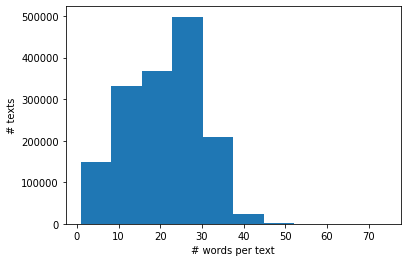

Максимальное количество слов в самом длинном описании заявки: 40 слов
Average appeals length:  20.917676677516923


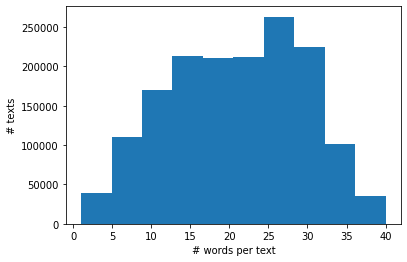

In [ ]:
"""Давайте проверим длину предложений в наборе данных:"""
# В цикле каждое предлолжение (столбец описание) делится на слова и с помощью функции len() определяется количество слов в этом предложении. В результате в переменную записывается список, в котором хранится длина каждого предложения.
txt_lengths = [len(t.split()) for t in descriptions] 
# Выводится средняя длина всех предложений, полученных с помощью метода average() библиотеки numpy.
print('Average appeals length: ', np.average(txt_lengths))
# Подготовка даных для графического представления. Здесь plt.hist() готовит представление в виде гистограммы длин предложений.
# Методы plt.xlabel и plt.ylabel генерирует подписи по осям абцисс и ординат соответственно.
# Метод plt.show() отображает графическое представление.
p = plt.hist(txt_lengths)
l = plt.xlabel('# words per text')
l = plt.ylabel('# texts')
plt.show()

# В наборе данных есть категории, длина предложений заявок которых сравнительно велика относительно всей массы заявок. При этом количество таких преложений мало. В любом случае для таких данных резервируется память, тогда как вклад их в нейронную сеть пренебрижительно невелик. Уберем из общего набора данных такие предложения. Метод реализуется через подсчет количества слов в каждом предложении и определении удельного количества таких предложений. В случае если их набор порядка 1% из общего, происходит их отсечение.
#Определяется длина преложения размером 99% от общей длины всех преложений.
len_desc = len(descriptions) * 0.99
# Формируется список из количества длин предложений в порядке их возрастания.
stat_dlina = list(statick_po_categor(txt_lengths).values())
# объявление переменных k - текущая длин всех предложений, i - счетчик количества слов в предложении.
k = 0
i = 0
# Цикл пока суммарная текущая длина предложений не превышает 99%. Цикл завершится как только условие не выполнится, после чего в переменную maxSequenceLength запишется значение переменной i, а именно значение количества слов в предложении, после которого они будут отбрасываться.
while len_desc > k:
    k += stat_dlina[i]
    i += 1
else:
    maxSequenceLength = i

# Для каждого предложения из списка descriptions убираем слова, достигая их количества в предложении со значением maxSequenceLength
descriptions = [' '.join(x.split()[:maxSequenceLength]) for x in descriptions]
maxSequenceLength = max(len(x.split()) for x in descriptions)

print('Максимальное количество слов в самом длинном описании заявки: {} слов'.format(maxSequenceLength))
# Формирование новой гистограммы с изменившимся набором данных и отображение его на экране
txt_lengths = [len(t.split()) for t in descriptions]
print('Average appeals length: ', np.average(txt_lengths))
p = plt.hist(txt_lengths)
l = plt.xlabel('# words per text')
l = plt.ylabel('# texts')
plt.show()

In [ ]:
import re

In [ ]:
def clear_text(data):
    data = re.sub(r"[^\w\s]", " ", str(data).lower()) # понижение в нижний регист и удаление посторонних символов
    data = ' '.join(words for words in data.split())
    return data

In [ ]:
descriptions1 = list(map(clear_text, descriptions))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(descriptions, categories_code, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(descriptions, categories_code, test_size=0.05, random_state=42)
# Приведение массива меток categories_code к массиву numpy.
all_y = np.array(categories_code)
#Вызов метода class_weight.compute_class_weight() для назнаячения весов меткам данных.
class_weights_ist = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_y),
    y=all_y
)
# Для каждой метки и значения весов данных создается словарь вида: метка = вес.
class_weights_dict = {i: x for i, x in enumerate(class_weights_ist)}

In [ ]:
# Создаем экземпляр класса Tokenizer. 
tokenizer = Tokenizer()
# Через вызов метода fit_on_texts для тренировочных данных X_train создаём словарь вида слово = числовое прдеставление  
tokenizer.fit_on_texts(X_train)

# Получение количества уникальных слов в словаре
max_features = (len(tokenizer.word_counts)) + 1
print('Всего уникальных слов в словаре: {}'.format(max_features))


# Вызов функции prep_text() для набора обучающих и тестовых данных для преобразования предложений из этих наборов в список целочисленных значений
X_train = prep_text(X_train, tokenizer, max_sequence_length=maxSequenceLength)
X_test = prep_text(X_test, tokenizer, max_sequence_length=maxSequenceLength)

print('Размерность X_train:', X_train.shape)
print('Размерность X_test:', X_test.shape)


# # преобразование к массиву numpy.
y_train = np.array(y_train)
y_test = np.array(y_test)

Всего уникальных слов в словаре: 641039
Размерность X_train: (1500701, 40)
Размерность X_test: (78985, 40)


In [ ]:
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
num_classes = len(labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout, GlobalMaxPool1D

embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(total_categories, activation="softmax"))


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # SparseCategoricalFocalLoss(gamma=2, class_weight=list(class_weights_dict.values())
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
# Объявление список функций возврата, состоящего из единственной функции EarlyStopping(). Если в течение 4 эпох значение monitor не улучшиться, то обучение прекращается и возвращается веса лучшей эпохи.
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=4, verbose=1,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5', 'val_accuracy',
        save_best_only=True,
        save_weights_only=True
    )
]

In [ ]:
history = model.fit(
    X_train, y_train,
    class_weight=class_weights_dict,
    batch_size=128,
    epochs=1024,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

Epoch 1/1024
11725/11725 [==============================] - 647s 54ms/step - loss: 4.2884 - accuracy: 0.5579 - val_loss: 1.1189 - val_accuracy: 0.7638
Epoch 2/1024
11725/11725 [==============================] - 633s 54ms/step - loss: 2.1144 - accuracy: 0.7873 - val_loss: 0.8440 - val_accuracy: 0.8136
Epoch 3/1024
11725/11725 [==============================] - 628s 54ms/step - loss: 1.3527 - accuracy: 0.8378 - val_loss: 0.7133 - val_accuracy: 0.8436
Epoch 4/1024
11725/11725 [==============================] - 628s 54ms/step - loss: 0.9553 - accuracy: 0.8664 - val_loss: 0.6744 - val_accuracy: 0.8532
Epoch 5/1024
11725/11725 [==============================] - 629s 54ms/step - loss: 0.7051 - accuracy: 0.8858 - val_loss: 0.6248 - val_accuracy: 0.8670
Epoch 6/1024
11725/11725 [==============================] - 626s 53ms/step - loss: 0.5511 - accuracy: 0.8985 - val_loss: 0.6232 - val_accuracy: 0.8693
Epoch 7/1024
11725/11725 [==============================] - 627s 53ms/step - loss: 0.4225 - ac

In [ ]:
model.summary()

In [ ]:
with open('categories.json', 'r') as f:
    categories = json.load(f)


with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

In [ ]:
model = tf.keras.models.load_model('model')

In [ ]:
model.load_weights('best_model.h5')

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_test, y_test)

2469/2469 [==============================] - 13s 5ms/step - loss: 0.6187 - accuracy: 0.8838


[0.6186720728874207, 0.8838260173797607]

In [ ]:
model.save('best_model_8838.h5')

In [ ]:
reversed_categories = dict((v, k) for k, v in categories.items())

In [ ]:
def predict_model(text):
    data = clear_text(text)
    data = prep_text([data], tokenizer, maxSequenceLength)
    predict = model.predict(data)
    return predict

In [ ]:
predict = predict_model('трубы')

In [ ]:
order = np.argsort(predict)

In [ ]:
for i in range(6):
  value_index = order[0][-i - 1]
  print(reversed_categories[value_index], predict[0][value_index])

7303 0.85946816
5909 0.037011247
7411 0.035539743
8307 0.014096855
7507 0.011220477
7304 0.007537282
